# King County Housing Data – Exploratory Data Analysis (EDA)

This notebook explores the King County Housing dataset. 
- **`king_county_house_details_202512091731.csvsales_id`** &
- **`king_county_house_sales_202512091732.csv`**

The goal is to understand the data, find patterns, validate hypotheses, and provide insights and recommendations for a client.

We will follow the EDA checklist:

1. Understanding the data 
2. Hypothesis based om questions
3. Explore looking for groups,
4. Clean dial with missing data outlines extreme values 
5. Relationships check of correlation make this sense?
6. Back to the Hypothesis are the assumption correct
7. Fine Tune clean and check the plots add comments 
8. Explanation why make this analysis
9. Information & links

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [3]:
# Load data /data
sales = pd.read_csv("data/king_county_house_sales_202512091732.csv")
details = pd.read_csv("data/king_county_house_details_202512091731.csv")

sales.head(), details.head()

(         date     price    house_id  id
 0  2014-10-13  221900.0  7129300520   1
 1  2014-12-09  538000.0  6414100192   2
 2  2015-02-25  180000.0  5631500400   3
 3  2014-12-09  604000.0  2487200875   4
 4  2015-02-18  510000.0  1954400510   5,
            id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
 0     1000102       6.0        3.0       2400.0    9373.0     2.0         NaN   
 1   100100050       3.0        1.0       1320.0   11090.0     1.0         0.0   
 2  1001200035       3.0        1.0       1350.0    7973.0     1.5         NaN   
 3  1001200050       4.0        1.5       1260.0    7248.0     1.5         NaN   
 4  1003000175       3.0        1.0        980.0    7606.0     1.0         0.0   
 
    view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
 0   0.0          3      7      2400.0            0.0      1991           0.0   
 1   0.0          3      7      1320.0            0.0      1955           0.0   
 2   0.0        

matter

## 1. Understanding the Data

We check the structure, column names, and data types.


In [4]:
# check head and info of both dataframes
sales.info(),
details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 

01.  checking the merged data we will Do light cleaning first — NOT full cleaning — then explore and refine.
02. but as first I prepare df2 to compare how it looks if we use as unique Id the house id and not the sales id 
03. below now back to df original data 


In [5]:
# Merge from the sales "house_id to detail "id"
df = sales.merge(details, 
left_on="house_id", 
right_on="id", how="left")

print(df.shape)
df.head()

(21597, 23)


,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


In [6]:
# Align with `column_names.md`.
# Change the names to the repo proposed "Column Names and descriptions for King County Data Set"

df.rename(columns={
    "id_y": "id",                       # y is ID from details
    "id_x": "sales_id",                  # x is ID from sales, kept for reference
    "house_id": "house_id",              # original house_id from sales, optional
    "date": "dateDate",                  # sales date "dateDate" house was sold
    "price": "pricePrice",               # is prediction target
    "bedrooms": "bedroomsNumber",        # number of bedrooms
    "bathrooms": "bathroomsNumber",      # number of bathrooms
    "sqft_living": "sqft_livingsquare", # footage of the home
    "sqft_lot": "sqft_lotsquare",       # footage of the lot
    "floors": "floorsTotal",            # floors (levels) in house
    "waterfront": "waterfront",         # house with waterfront view
    "view": "view",                      # quality of view
    "condition": "condition",            # overall condition rating
    "grade": "grade",                    # overall grade (King County system)
    "sqft_above": "sqft_above",          # square footage above basement
    "sqft_basement": "sqft_basement",    # square footage basement
    "yr_built": "yr_built",              # year built
    "yr_renovated": "yr_renovated",      # year renovated
    "zipcode": "zipcode",                # zip code
    "lat": "lat",                        # latitude
    "long": "long",                      # longitude
    "sqft_living15": "sqft_living15",    # living area of 15 nearest neighbors
    "sqft_lot15": "sqft_lot15"           # lot area of 15 nearest neighbors
}, inplace=True)

print(list(df.columns)) # take columns as list

['dateDate', 'pricePrice', 'house_id', 'sales_id', 'id', 'bedroomsNumber', 'bathroomsNumber', 'sqft_livingsquare', 'sqft_lotsquare', 'floorsTotal', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [7]:

# Show all columns as a list
print(list(df.columns))

# Show first and last rows in full length
from IPython.display import display

print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())


['dateDate', 'pricePrice', 'house_id', 'sales_id', 'id', 'bedroomsNumber', 'bathroomsNumber', 'sqft_livingsquare', 'sqft_lotsquare', 'floorsTotal', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

First 5 rows:


,dateDate,pricePrice,house_id,sales_id,id,bedroomsNumber,bathroomsNumber,sqft_livingsquare,sqft_lotsquare,floorsTotal,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0



Last 5 rows:


,dateDate,pricePrice,house_id,sales_id,id,bedroomsNumber,bathroomsNumber,sqft_livingsquare,sqft_lotsquare,floorsTotal,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,2014-05-21,360000.0,263000018,21593,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,1530.0,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0
21593,2015-02-23,400000.0,6600060120,21594,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,2310.0,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0
21594,2014-06-23,402101.0,1523300141,21595,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,1020.0,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0
21595,2015-01-16,400000.0,291310100,21596,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,1600.0,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0
21596,2014-10-15,325000.0,1523300157,21597,1523300157,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,1020.0,0.0,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0


In [8]:

# Show all column names as a list
print("Columns:", list(df.columns))

# Show first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Show last 5 rows
print("\nLast 5 rows:")
print(df.tail())


Columns: ['dateDate', 'pricePrice', 'house_id', 'sales_id', 'id', 'bedroomsNumber', 'bathroomsNumber', 'sqft_livingsquare', 'sqft_lotsquare', 'floorsTotal', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

First 5 rows:
     dateDate  pricePrice    house_id  sales_id          id  bedroomsNumber  \
0  2014-10-13    221900.0  7129300520         1  7129300520             3.0   
1  2014-12-09    538000.0  6414100192         2  6414100192             3.0   
2  2015-02-25    180000.0  5631500400         3  5631500400             2.0   
3  2014-12-09    604000.0  2487200875         4  2487200875             4.0   
4  2015-02-18    510000.0  1954400510         5  1954400510             3.0   

   bathroomsNumber  sqft_livingsquare  sqft_lotsquare  floorsTotal  \
0             1.00             1180.0          5650.0          1.0   
1             2.25             2570.0          7242.0

In [9]:
print(df.columns)

Index(['dateDate', 'pricePrice', 'house_id', 'sales_id', 'id',
       'bedroomsNumber', 'bathroomsNumber', 'sqft_livingsquare',
       'sqft_lotsquare', 'floorsTotal', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
# Fix error in renovation year (e.g., correcting 20150.0 to 2015.0) this was below and now with this sequence is this ok)

# Show the maximum year before correction (should output 20150.0)
print(f"Maximum renovation year (before correction): {df['yr_renovated'].max()}")

def correct_renovation_year(year):
    # Pandas treats NaNs as floats. To avoid errors, we first check 
    # if the value is NaN before performing calculations.
    if pd.isna(year):
        return year
    
    # If the year is unrealistically high (> 2100), divide by 10
    if year > 2100: 
        return year / 10
    return year

# Apply the correction to the column
df['yr_renovated'] = df['yr_renovated'].apply(correct_renovation_year)

# Show the maximum year after correction (should now be realistic, e.g., 2015.0)
print(f"Maximum renovation year (after correction): {df['yr_renovated'].max()}")



Maximum renovation year (before correction): 20150.0
Maximum renovation year (after correction): 2015.0


In [11]:
# Date converting
print(f"Date type before converting: {df['dateDate'].dtype}")

df['dateDate'] = pd.to_datetime(df['dateDate'])

print(f"Date type after converting: {df['dateDate'].dtype}")

# Extract the month into a new column (this we can use later to check price per season)
df['sale_month'] = df['dateDate'].dt.month

print("First 5 months of sales:", df['sale_month'].head())


Date type before converting: object
Date type after converting: datetime64[ns]
First 5 months of sales: 0    10
1    12
2     2
3    12
4     2
Name: sale_month, dtype: int32


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Berechnen Sie den Medianpreis und die durchschnittlichen Koordinaten pro Postleitzahl
zipcode_data = df.groupby('zipcode').agg(
    median_price=('pricePrice', 'median'),
    avg_lat=('lat', 'mean'),
    avg_long=('long', 'mean'),
    count=('pricePrice', 'count')
).reset_index()

# Filtern Sie nur die Top 10 teuersten Postleitzahlen und sortieren Sie sie
top_10_zips = zipcode_data.sort_values(by='median_price', ascending=False).head(10).copy()
top_10_zips['Rank'] = range(1, 11)

# 2. Definieren Sie die Koordinaten für Ihre 4 Orientierungspunkte (Sterne)
# Helden und Riesen mit Postleitzahl-Bezug
landmarks_data = pd.DataFrame({
    'Name': [
        'Thor - Herrscher über 98101',  # Downtown Seattle
        'Eisenkarl - Wächter von 98108',  # SEA Airport Area
        'Bifröst-Wächter - Brücke zu 98004',  # Bellevue
        'Midgard-Schlange - Bewohner von 98040'  # Mercer Island
    ],
    'lat': [47.6205, 47.4489, 47.6094, 47.6],
    'long': [-122.3493, -122.3093, -122.1994, -122.25],
    'Color': ['#FF0000', '#00FF00', '#0000FF', '#FFA500'],
    'Symbol': ['⚡', '🛡️', '🌈', '🐍']  # Symbole für Helden/Riesen
})

# 3. Globale Skalierung
max_price_overall = df['pricePrice'].max()
SIZE_SCALE_MIN = 50
SIZE_SCALE_MAX = 600

# Geografische Grenzen
map_long_min = df['long'].min() - 0.01
map_long_max = df['long'].max() + 0.01
map_lat_min = df['lat'].min() - 0.01
map_lat_max = df['lat'].max() + 0.01

# 4. Erstellen Sie den Plot mit Legende
plt.figure(figsize=(14, 10))

# Plot 1: Top 10 Postleitzahlen (Punkte)
scatter = sns.scatterplot(
    data=top_10_zips,
    x='avg_long',
    y='avg_lat',
    size=top_10_zips['median_price'],
    hue='Rank',
    sizes=(SIZE_SCALE_MIN, SIZE_SCALE_MAX),
    palette='Blues_d',
    alpha=0.8,
    legend='full'
)

# Plot 2: Landmarks als Symbole mit Postleitzahlen
for index, row in landmarks_data.iterrows():
    plt.scatter(
        x=row['long'],
        y=row['lat'],
        color=row['Color'],
        s=400,  # Größere Symbole für "Helden/Riesen"
        marker='$' + row['Symbol'] + '$',  # Unicode-Symbole
        edgecolor='black',
        linewidth=2,
        zorder=5  # Im Vordergrund
    )

# 5. Fügen Sie Legendentexte mit Postleitzahl-Bezug hinzu
legend_texts = []

# Legende für Postleitzahlen-Ränge
for i, (_, row) in enumerate(top_10_zips.iterrows(), 1):
    legend_texts.append(f"🏆 Rang {i}: PLZ {row['zipcode']} (${row['median_price']:,.0f})")

# Trennlinie
legend_texts.append("─" * 50)

# Legende für Helden und Riesen mit Postleitzahlen
heroes_legend = [
    "⚡ Thor - Herrscher über Downtown Seattle (98101)",
    "🛡️ Eisenkarl - Wächter des Flughafens (98108)",
    "🌈 Bifröst-Wächter - Brücke nach Bellevue (98004)",
    "🐍 Midgard-Schlange - Bewohner von Mercer Island (98040)"
]

legend_texts.extend(heroes_legend)

# 6. Legende als Textbox hinzufügen
legend_text = "\n".join(legend_texts)
plt.text(
    0.02, 0.98,  # Position links oben
    legend_text,
    transform=plt.gca().transAxes,
    verticalalignment='top',
    bbox=dict(
        boxstyle='round',
        facecolor='lightyellow',
        alpha=0.9,
        edgecolor='gold',
        linewidth=2
    ),
    fontsize=9,
    family='monospace'
)

# 7. Achseneinstellungen
plt.xlim(map_long_min, map_long_max)
plt.ylim(map_lat_min, map_lat_max)

plt.title("Die Legende von Seattle: Helden, Riesen und die wertvollsten Postleitzahlen", 
          fontsize=14, fontweight='bold')
plt.xlabel("Längengrad (Longitude)")
plt.ylabel("Breitengrad (Latitude)")

# Hauptlegende für die Punkte anpassen
handles, labels = scatter.get_legend_handles_labels()
# Nur die relevanten Legenden-Elemente behalten
plt.legend(
    handles[:10], 
    [f'Rang {i+1}' for i in range(10)],
    title='Top 10 PLZ Ränge',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

# 8. Detaillierte Ausgabe der Legende
print("=" * 70)
print("LEGENDE AUS DEM REICH DER HELDEN UND RIESEN")
print("=" * 70)
print("\n🏆 DIE TOP 10 KÖNIGREICHE (POSTLEITZAHLEN):")
for _, row in top_10_zips.iterrows():
    print(f"   Rang {row['Rank']:2d}: PLZ {row['zipcode']} - ${row['median_price']:,.0f}")

print("\n" + "⚔️" * 35)
print("\nHELDEN UND RIESEN DER REGION:")
print("-" * 40)
for _, row in landmarks_data.iterrows():
    # Extrahiere die Postleitzahl aus dem Namen
    import re
    zip_match = re.search(r'\b(\d{5})\b', row['Name'])
    zip_code = zip_match.group(1) if zip_match else "Unbekannt"
    
    print(f"   {row['Symbol']} {row['Name']}")
    print(f"     Lage: {row['lat']:.4f}°N, {row['long']:.4f}°W")
    print(f"     Postreich: {zip_code}")
    print()

print("Die Größe der Kreise zeigt den Medianpreis der Postleitzahl.")
print("Je größer der Kreis, desto wertvoller das Königreich!")

KeyError: "Column(s) ['pricePrice'] do not exist"

In [12]:
# Correction for the renovation year (e.g., changing 19910.0 to 1991.0)

# Show the max year before correction
print(f"Max renovation year (before correction): {df['yr_renovated'].max()}")

def correct_renovation_year(year):
    # If the year is unrealistic (more than 2100), divide by 10
    if year > 2100: 
        return year / 10
    return year

# Apply this function to the column
df['yr_renovated'] = df['yr_renovated'].apply(correct_renovation_year)

# Show the max year, hoping this is realistic now
print(f"Max renovation year (after correction): {df['yr_renovated'].max()}")


Max renovation year (before correction): 2015.0
Max renovation year (after correction): 2015.0


In [13]:
# Fill missing values (NaNs) in the relevant columns

# Check the NaNs before filling
print("NaNs before filling:")
print(df[['waterfront', 'view', 'yr_renovated']].isna().sum())

# Fill all NaNs in these columns with 0 
# i think (no waterfront, no view, not renovated) is "none"
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Check the NaNs after filling
print("\nNaNs after filling:")
print(df[['waterfront', 'view', 'yr_renovated']].isna().sum())


# Below we can check the outcome a 0 or 1  can be use later 
df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)


NaNs before filling:
waterfront      2391
view              63
yr_renovated    3848
dtype: int64

NaNs after filling:
waterfront      0
view            0
yr_renovated    0
dtype: int64


## 2. Hypotheses

Before exploring the data, here are some assumptions:

1. Houses closer to the water are more expensive.
2. Houses with more bedrooms and bathrooms have higher prices.
3. Some ZIP codes might form “rich neighborhoods”.
4. Newer, renovated houses should have higher prices.

These will be tested during EDA.


# use miro bort to collect all information 
https://miro.com/app/board/uXjVGd0Xl8o=/

## 3. Explore the Data

We look for:
- Missing values  
- Outliers  
- Strange values  
- Distribution of key columns  


In [14]:
sales.isna().sum(), details.isna().sum()


(date        0
 price       0
 house_id    0
 id          0
 dtype: int64,
 id                  0
 bedrooms            0
 bathrooms           0
 sqft_living         0
 sqft_lot            0
 floors              0
 waterfront       2360
 view               63
 condition           0
 grade               0
 sqft_above          0
 sqft_basement     451
 yr_built            0
 yr_renovated     3811
 zipcode             0
 lat                 0
 long                0
 sqft_living15       0
 sqft_lot15          0
 dtype: int64)

In [15]:
sales.describe()


,price,house_id,id
count,2.159700e+04,2.159700e+04,21597.000000
mean,5.402966e+05,4.580474e+09,10799.000000
std,3.673681e+05,2.876736e+09,6234.661218
min,7.800000e+04,1.000102e+06,1.000000
25%,3.220000e+05,2.123049e+09,5400.000000
50%,4.500000e+05,3.904930e+09,10799.000000
75%,6.450000e+05,7.308900e+09,16198.000000
max,7.700000e+06,9.900000e+09,21597.000000


In [16]:
df = sales.merge(details, on="id", how="left")
df.head()


,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-09,538000.0,6414100192,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-25,180000.0,5631500400,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-09,604000.0,2487200875,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-18,510000.0,1954400510,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


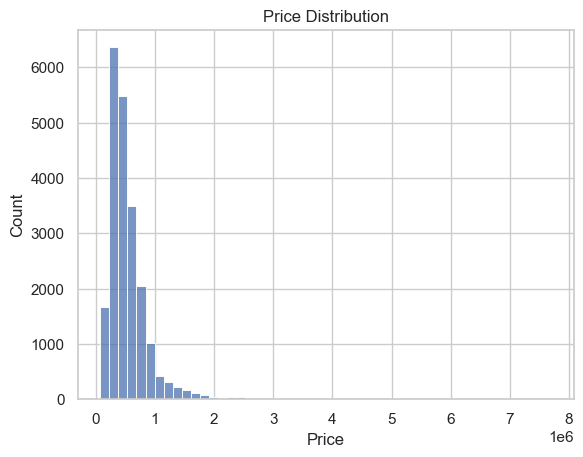

In [17]:
sns.histplot(df["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [18]:
# Missing values overview (both tables)

print("=== Missing values in sales ===")
display(sales.isna().sum().sort_values(ascending=False))

print("\n=== Missing values in details ===")
display(details.isna().sum().sort_values(ascending=False))




=== Missing values in sales ===


date        0
price       0
house_id    0
id          0
dtype: int64


=== Missing values in details ===


yr_renovated     3811
waterfront       2360
sqft_basement     451
view               63
id                  0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
grade               0
sqft_above          0
bedrooms            0
condition           0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
sqft_lot15          0
dtype: int64

In [19]:
#Describe sales (price, date sanity)
print("=== sales.describe() ===")
display(sales.describe(include='all').T)

# Check dtypes for IDs
print("\nID dtypes -> sales['id']:", sales['id'].dtype, ", sales['house_id']:", sales['house_id'].dtype)
print("ID dtype -> details['id']:", details['id'].dtype)
print("sales['id'].is_unique:", sales['id'].is_unique)
print("sales['house_id'].is_unique:", sales['house_id'].is_unique)
print("details['id'].is_unique:", details['id'].is_unique)


=== sales.describe() ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,21597,372,2014-06-23,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21597.0,NaN,NaN,NaN,540296.573506,367368.140101,78000.0,322000.0,450000.0,645000.0,7700000.0
house_id,21597.0,NaN,NaN,NaN,4580474287.770987,2876735715.74778,1000102.0,2123049175.0,3904930410.0,7308900490.0,9900000190.0
id,21597.0,NaN,NaN,NaN,10799.0,6234.661218,1.0,5400.0,10799.0,16198.0,21597.0



ID dtypes -> sales['id']: int64 , sales['house_id']: int64
ID dtype -> details['id']: int64
sales['id'].is_unique: True
sales['house_id'].is_unique: False
details['id'].is_unique: True


## 4. Cleaning the Data

We check:
- Incorrect values  
- Missing values  
- Outliers  
- Whether we need to transform variables (log, categories, etc.)


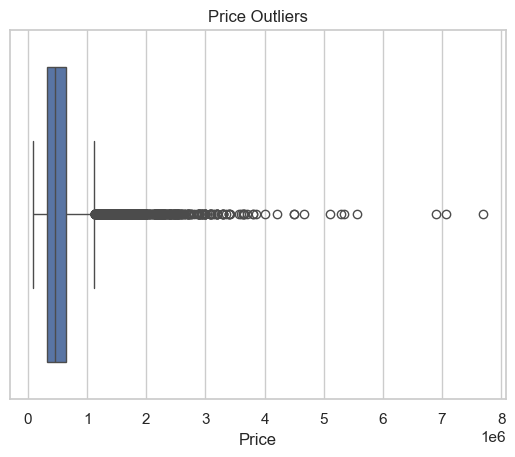

In [20]:
sns.boxplot(x=df["price"])
plt.title("Price Outliers")
plt.xlabel("Price")
plt.show()



## ID Mapping & Join Logic

This project uses three identifiers:

- **`sales_id`** – The unique transaction ID (each sale event).
- **`house_id`** – The property identifier in the `sales` table (can repeat if the same house was sold multiple times).
- **`id`** – The unique property identifier in the `details` table (one row per house).

**Join rule:**  
`sales.house_id` ⟶ `details.id` (left join) to enrich each sale with house characteristics.

**Why this matters:**
- Use **`sales_id`** for *transaction-level* analyses (price distributions, time series).
- Use **`house_id`** (group by) for *property-level* trends (e.g., repeated sales, renovation effects).
- Use **`details.id`** as the *authoritative property key* for house attributes (size, grade, lat/long, etc.).

In [21]:

# open images 
try:
    img = Image.open(image_path)
    print(f"{image_path}")
    
    plt.imshow(img)
    plt.axis('off') # Achsen ausblenden
    plt.show()
except Exception as e:
    print()

## 5. Relationships

We explore correlations between variables.


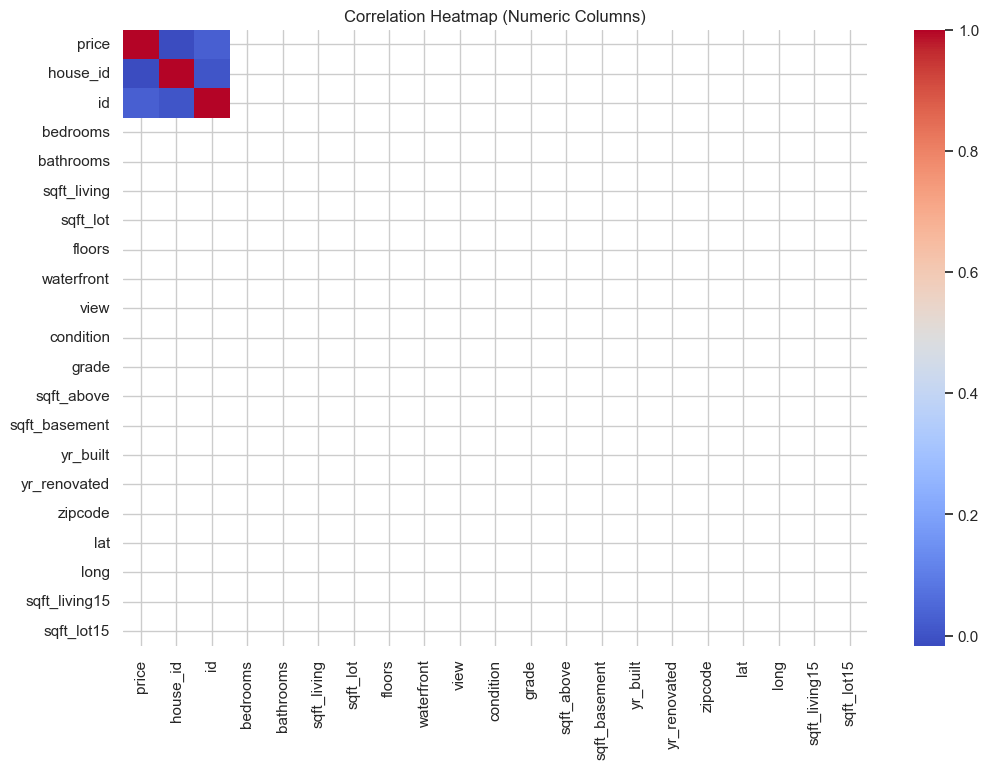

In [22]:
plt.figure(figsize=(12,8))
# Select numeric columns to avoid errors
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

## 6. Back to the Hypotheses

We check if our assumptions are true or not and update them if necessary.


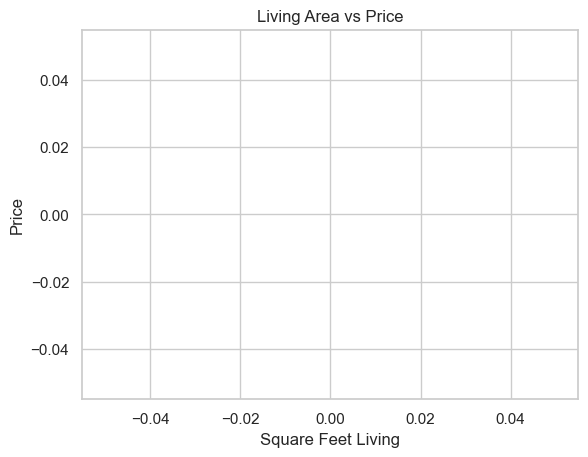

In [23]:
sns.scatterplot(data=df, x="sqft_living", y="price")
plt.title("Living Area vs Price")
plt.xlabel("Square Feet Living")
plt.ylabel("Price")
plt.show()


## 7. Fine Tune

Remove unnecessary plots, make visuals clear, add labels, and prepare clean results for the client.


## 8. Explain – Insights & Recommendations

### Insights (at least 3)
- Insight 1  
- Insight 2  
- Insight 3  

### Geographic Insight
- ZIP code or location-based finding  

### Recommendations (at least 3)
- Rec 1  
- Rec 2  
- Rec 3  

Client chosen: **(your choice)**


## OLD only to know the points  Explain – Insights & Recommendations

### Conclusion how to use the data 

ID Usage Summary – King County Housing Data

**sales_id:** Represents each individual transaction. Use this for plots and analyses that focus on all sales, such as overall price distributions, time series of sales, or histograms.

**house_id:** Represents the unique property. Use this to track house-specific trends over time, e.g., price changes for the same house, effects of renovations, or neighborhood comparisons.

**Best practice:**

For overall sales analysis, use sales_id.

For per-house trend analysis, group or merge using house_id.

You can combine both: use house_id as the grouping key and sales_id as the index to preserve the full transaction history.

This ensures clarity, avoids duplicates, and allows flexible analysis for both individual transactions and property-specific trends.

### Insights (at least 3)
- Insight 1  
- Insight 2  
- Insight 3  

### Geographic Insight
- ZIP code or location-based finding  

### Recommendations (at least 3)
- Rec 1  
- Rec 2  
- Rec 3  

Our Client is Timothy Stevens  (Seller)
Owns expensive houses in the center, needs to get rid, best timing within a year, open for renovation when profits rise                                                         

Checklist out ot the deliverables :
- Insights (≥3)
- Geographic insight
- Recommendations (≥3)

